# Построение прототипа скоринговой модели для МФО на основе логистической регресии.

# Вызов библиотек и изучение данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
data = pd.read_csv('data.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_id                      23116 non-null  int64  
 1   cred_sum_cc_all               23116 non-null  float64
 2   mfo_inqs_count_month          23116 non-null  int64  
 3   all_closed_creds_sum_all      23116 non-null  int64  
 4   bank_inqs_count_quarter       23116 non-null  int64  
 5   cred_max_overdue_max_ly       23116 non-null  float64
 6   all_active_creds_sum_all      23116 non-null  int64  
 7   mfo_last_days_all             23116 non-null  int64  
 8   cred_sum_cc_ly                23116 non-null  float64
 9   cred_sum_debt_all_all         23116 non-null  float64
 10  all_closed_creds_sum_ly       23116 non-null  int64  
 11  mfo_cred_mean_sum_3lm         23116 non-null  float64
 12  delay_more_sum_all            23116 non-null  int64  
 13  a

order_id  cred_sum_cc_all  mfo_inqs_count_month  \
count  2.311600e+04     2.311600e+04          23116.000000   
mean   6.060602e+06     4.424794e+04              1.284262   
std    3.678480e+05     1.006016e+05              2.373415   
min    5.498546e+06     0.000000e+00              0.000000   
25%    5.739749e+06     0.000000e+00              0.000000   
50%    6.020794e+06     5.000000e+03              0.000000   
75%    6.445488e+06     4.972685e+04              2.000000   
max    6.697265e+06     5.739786e+06             25.000000   

       all_closed_creds_sum_all  bank_inqs_count_quarter  \
count              2.311600e+04             23116.000000   
mean               1.653574e+05                 3.760642   
std                4.788942e+05                 5.057107   
min                0.000000e+00                 0.000000   
25%                3.000000e+03                 0.000000   
50%                3.083450e+04                 2.000000   
75%                1.357758e+05                 5.000000   
max                3.030997e+07                67.000000   

       cred_max_overdue_max_ly  all_active_creds_sum_all  mfo_last_days_all  \
count             2.311600e+04              2.311600e+04       23116.000000   
mean              4.070925e+03              1.284212e+05        2615.988925   
std               2.689042e+04              3.890718e+05        4228.621029   
min               0.000000e+00              0.000000e+00           0.000000   
25%               0.000000e+00              2.000000e+03          13.000000   
50%               0.000000e+00              1.500000e+04          83.500000   
75%               3.000000e+03              7.500000e+04        2070.500000   
max               1.914581e+06              1.200000e+07        9999.000000   

       cred_sum_cc_ly  cred_sum_debt_all_all  ...  cred_max_overdue_max_3lm  \
count    23116.000000           2.311600e+04  ...              23116.000000   
mean     10672.104919           8.414683e+04  ...               1107.137568   
std      37246.943546           3.054724e+05  ...               7073.931364   
min          0.000000           0.000000e+00  ...                  0.000000   
25%          0.000000           0.000000e+00  ...                  0.000000   
50%          0.000000           5.000000e+03  ...                  0.000000   
75%          0.000000           3.496056e+04  ...                  0.000000   
max     878000.000000           1.150825e+07  ...             673495.420000   

       mfo_closed_count_ly  cred_sum_overdue_cc_all  count_overdue_all_3lm  \
count         23116.000000             2.311600e+04           23116.000000   
mean              3.474087             4.878172e+03               0.118576   
std               9.202313             3.793714e+04               0.466854   
min               0.000000             0.000000e+00               0.000000   
25%               0.000000             0.000000e+00               0.000000   
50%               0.000000             0.000000e+00               0.000000   
75%               3.000000             0.000000e+00               0.000000   
max             344.000000             2.878197e+06              10.000000   

       all_creds_count_lm     work_code  month_income        region  \
count        23116.000000  23116.000000  23116.000000  23116.000000   
mean             1.080637      3.433250  39363.189998     47.632203   
std              2.137757      1.370812  13887.644526     27.615823   
min              0.000000      1.000000      0.000000      0.000000   
25%              0.000000      2.000000  35000.000000     25.000000   
50%              0.000000      3.000000  35000.000000     46.000000   
75%              1.000000      5.000000  50000.000000     70.000000   
max             48.000000      5.000000  65000.000000     99.000000   

               bad      approved  
count  7269.000000  23116.000000  
mean      0.270051      0.314458  
std       0.444016      0.464310  
min 

Данные хорошего качества - без явных выбросов и без пропусков (за исключением столбца bad - причина указана в условии). Все переменные кроме региона и профессии количественными.

## Выявление значимых факторов влияющих на возврат в текущей скоринговой модели

In [2]:
data.groupby('approved').mean()

order_id  cred_sum_cc_all  mfo_inqs_count_month  \
approved                                                        
0         6.046354e+06     31091.186909              0.898403   
1         6.091663e+06     72930.696846              2.125464   

          all_closed_creds_sum_all  bank_inqs_count_quarter  \
approved                                                      
0                    116558.606424                 2.447908   
1                    271742.530197                 6.622507   

          cred_max_overdue_max_ly  all_active_creds_sum_all  \
approved                                                      
0                     4470.336032              82021.472266   
1                     3200.177498             229576.362086   

          mfo_last_days_all  cred_sum_cc_ly  cred_sum_debt_all_all  ...  \
approved                                                            ...   
0               3210.147347     4229.550854           37336.460635  ...   
1               1320.676159    24717.386837          186197.170845  ...   

          cred_day_overdue_all_sum_all  cred_max_overdue_max_3lm  \
approved                                                           
0                           369.257336                929.971675   
1                            18.967121               1493.373351   

          mfo_closed_count_ly  cred_sum_overdue_cc_all  count_overdue_all_3lm  \
approved                                                                        
0                     1.45649              6786.754930               0.134852   
1                     7.87261               717.309495               0.083093   

          all_creds_count_lm  work_code  month_income     region       bad  
approved                                                                    
0                   0.454786   3.509876  37558.623083  47.609327       NaN  
1                   2.445041   3.266199  43297.289861  47.682075  0.270051  

[2 rows x 24 columns]

Наблюдения:

- Положительные решения чаще получают клиенты с большой кредитной историей, те кто регулярно берет займы (all_creds_count_lm)
- Положительные решения свойственны клиентам с меньшей продолжительностью просрочки по кредитам

Любопытно рассмотреть решения в зависимости от суммарного кол-ва дней просрочки текущих кредитов:

[Text(0.5, 1.0, 'Доля отказов в выдаче кредита\n в зависимости от кол-ва дней просрочки по текущим кредитам')]

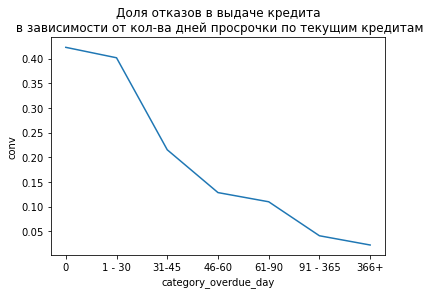

In [3]:
data1 = data.copy()

condition = [(data1['cred_day_overdue_all_sum_all'] == 0),
            (data1['cred_day_overdue_all_sum_all'] >= 1) & (data1['cred_day_overdue_all_sum_all'] < 31),
            (data1['cred_day_overdue_all_sum_all'] >= 31) & (data1['cred_day_overdue_all_sum_all'] < 46),
            (data1['cred_day_overdue_all_sum_all'] >= 46) & (data1['cred_day_overdue_all_sum_all'] < 61), 
            (data1['cred_day_overdue_all_sum_all'] >= 61) & (data1['cred_day_overdue_all_sum_all'] < 91),
            (data1['cred_day_overdue_all_sum_all'] >= 91) & (data1['cred_day_overdue_all_sum_all'] < 366),
            (data1['cred_day_overdue_all_sum_all'] >= 366)]

values = ['0','1 - 30','31-45','46-60','61-90','91 - 365','366+']

data1['category_overdue_day'] = np.select(condition,values)

overdue_pivot = data1.pivot_table('approved','category_overdue_day', aggfunc = {'count','sum'}).reset_index()
overdue_pivot['conv'] = overdue_pivot['sum']/overdue_pivot['count']

overdue_for_plot = overdue_pivot.sort_values('conv', ascending = False)
sns.lineplot(x = overdue_for_plot['category_overdue_day'],y = overdue_for_plot['conv']).set(title = 'Доля отказов в выдаче кредита\n в зависимости от кол-ва дней просрочки по текущим кредитам')

Вероятность одобрения значительно снижается, начиная со второго месяца просрочки по текущим кредитам. Если время просрочки превышает 90 дней - доля отказов более 95%

# Анализ влияния категориальных переменных (профессии и региона) на целевые переменные.

### Профессия

In [4]:
profi_data = data.pivot_table(['order_id','approved','bad'],'work_code',aggfunc = {'order_id':'count','approved':'sum','bad':'sum'}).reset_index()
profi_data = profi_data[[x for x in profi_data.columns if x not in ['approved','bad']] + ['approved','bad']]
profi_data['return'] = profi_data['approved'] - profi_data['bad']
profi_data['conv2approve'] = profi_data['approved']/profi_data['order_id']
profi_data['conv2return_without_refuse'] = profi_data['return']/profi_data['approved']
profi_data['conv2return'] = profi_data['return']/profi_data['order_id']
profi_data

work_code  order_id  approved    bad  return  conv2approve  \
0          1      2084       871  177.0   694.0      0.417946   
1          2      4881      1905  496.0  1409.0      0.390289   
2          3      4834      1100  279.0   821.0      0.227555   
3          4      3570      1204  303.0   901.0      0.337255   
4          5      7747      2189  708.0  1481.0      0.282561   

   conv2return_without_refuse  conv2return  
0                    0.796785     0.333013  
1                    0.739633     0.288670  
2                    0.746364     0.169839  
3                    0.748339     0.252381  
4                    0.676565     0.191171

По профессии 3 (офисный работник) - самая высокая доля отказов (77%). По профессии 5 (рабочий) - самая низкая доля возвратов при одобрении (68%), 1 (госслужащий) - целевой клиент с самой высокой долей возвратов.

### Регион

In [5]:
region_data = data.pivot_table(['order_id','approved','bad'],'region',aggfunc = {'order_id':'count','approved':'sum','bad':'sum'}).reset_index()
region_data = region_data[[x for x in region_data.columns if x not in ['approved','bad']] + ['approved','bad']]
region_data['return'] = region_data['approved'] - region_data['bad']
region_data['conv2approve'] = region_data['approved']/region_data['order_id']
region_data['conv2return_without_refuse'] = region_data['return']/region_data['approved']
region_data['conv2return'] = region_data['return']/region_data['order_id']
region_data.query('order_id > 50').describe()

region     order_id    approved        bad      return  \
count  80.000000    80.000000   80.000000  80.000000   80.000000   
mean   52.087500   287.262500   90.350000  24.362500   65.987500   
std    29.133127   230.371508   79.996535  20.380087   60.953706   
min     1.000000    54.000000   13.000000   3.000000    8.000000   
25%    27.750000   142.500000   43.000000   9.000000   31.500000   
50%    53.500000   191.000000   60.000000  17.500000   46.000000   
75%    78.250000   384.750000  113.750000  30.750000   82.750000   
max    98.000000  1115.000000  433.000000  87.000000  346.000000   

       conv2approve  conv2return_without_refuse  conv2return  
count     80.000000                   80.000000    80.000000  
mean       0.305490                    0.726883     0.222770  
std        0.041939                    0.071080     0.041049  
min        0.186441                    0.526316     0.105263  
25%        0.284529                    0.681503     0.203503  
50%        0.302462                    0.733160     0.218490  
75%        0.326706                    0.781794     0.242578  
max        0.406593                    0.872727     0.323583

In [6]:
region_data.query('order_id > 50').sort_values('conv2return',ascending = False)

region  order_id  approved   bad  return  conv2approve  \
32      40       547       220  43.0   177.0      0.402194   
37      45      1115       433  87.0   346.0      0.388341   
61      70       254        98  21.0    77.0      0.385827   
57      66       182        74  19.0    55.0      0.406593   
64      74       100        38   8.0    30.0      0.380000   
..     ...       ...       ...   ...     ...           ...   
80      90       112        28  10.0    18.0      0.250000   
10      12       192        57  27.0    30.0      0.296875   
81      91        62        17   8.0     9.0      0.274194   
83      93       118        22   7.0    15.0      0.186441   
85      95        76        15   7.0     8.0      0.197368   

    conv2return_without_refuse  conv2return  
32                    0.804545     0.323583  
37                    0.799076     0.310314  
61                    0.785714     0.303150  
57                    0.743243     0.302198  
64                    0.789474     0.300000  
..                         ...          ...  
80                    0.642857     0.160714  
10                    0.526316     0.156250  
81                    0.529412     0.145161  
83                    0.681818     0.127119  
85                    0.533333     0.105263  

[80 rows x 8 columns]

In [7]:
region_conv = region_data.copy().fillna(0)
mean_conv = region_conv['conv2return_without_refuse'].mean()
region_conv['conv_rate'] = np.where(region_conv['order_id'] > 50, region_conv['conv2return_without_refuse'],mean_conv)
dict_region_rate = pd.Series(region_conv.conv_rate.values, index = region_conv.region).to_dict()
print(dict_region_rate)

{0: 0.7056945617612211, 1: 0.6825396825396826, 3: 0.7303754266211604, 4: 0.6805555555555556, 5: 0.73, 7: 0.68, 8: 0.6375, 9: 0.6875, 10: 0.8043478260869565, 11: 0.7627118644067796, 12: 0.5263157894736842, 14: 0.6885245901639344, 15: 0.74, 17: 0.7341772151898734, 18: 0.6721311475409836, 19: 0.7708333333333334, 20: 0.7368421052631579, 22: 0.6923076923076923, 24: 0.6818181818181818, 25: 0.6475409836065574, 26: 0.7056945617612211, 27: 0.660377358490566, 28: 0.7341772151898734, 29: 0.7580645161290323, 30: 0.7368421052631579, 32: 0.6227544910179641, 33: 0.8064516129032258, 34: 0.8064516129032258, 36: 0.7177914110429447, 37: 0.6875, 38: 0.6607142857142857, 39: 0.85, 40: 0.8045454545454546, 41: 0.7586206896551724, 42: 0.6428571428571429, 43: 0.7056945617612211, 44: 0.7056945617612211, 45: 0.7990762124711316, 46: 0.7944862155388471, 47: 0.8333333333333334, 48: 0.7056945617612211, 49: 0.6944444444444444, 50: 0.6617647058823529, 52: 0.6666666666666666, 53: 0.7431192660550459, 54: 0.83720930232558

Можно выделить целевые регионы с высокой конверсией в возврат (32,37,61,57,64) и "токсичные" регионы, где несмотря на высокую долю отказов, доля возвратов чуть выше половины (52 - 53%). ОШИБКА в номерах

## Построение модели

### Проверка количественных переменных на независимость. Построение корреляционной матрицы.

<AxesSubplot:>

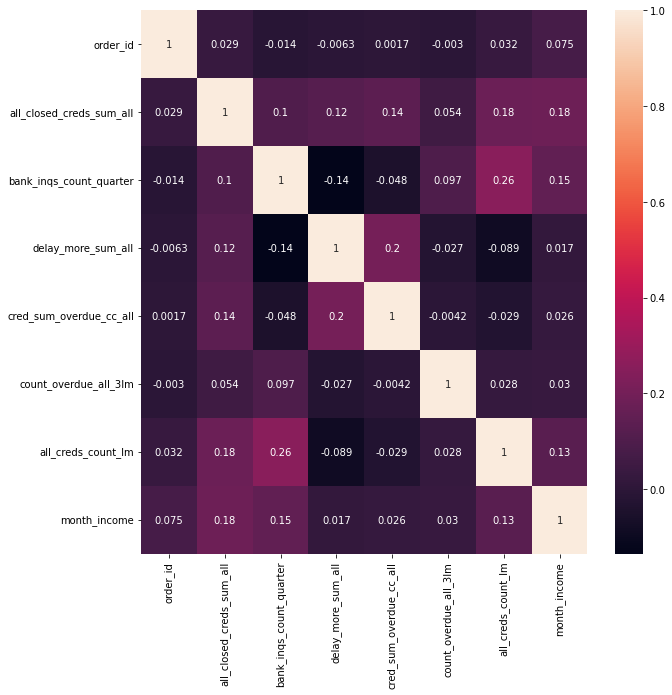

In [8]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.drop(['all_closed_creds_sum_ly','all_creds_count_all','cred_max_overdue_max_3lm',
                       'mfo_last_days_all','all_active_creds_sum_all','mfo_cred_mean_sum_3lm',
                       'cred_sum_debt_all_all',
                       'mfo_inqs_count_month','mfo_closed_count_ly','cred_sum_cc_all',
                       'cred_max_overdue_max_ly','cred_sum_cc_ly','cred_day_overdue_all_sum_all',
                       'work_code','region','bad','approved'], axis = 1).corr(method = 'pearson')
            ,annot = True,ax = ax)

На основе изучения парной корреляции Пирсона, Кендалла и Спирмена и сопоставления её с шкалой Чеддока из анализа были исключены ряд переменных, обладающие более чем умеренной связью, то есть коэффициентом корреляции 0,3 и более по модулю.

Были выявлены следующие взаимосвязи:

Высокая и сильная связь (0,7 - 1):

Исключили all_closed_creds_sum_ly, так как сумма закрытых кредитов за последний год связана с кол-вом закрытых МФО кредитов, взятых за последний год

Исключили all_creds_count_all, так как общее кол-во кредитов связано с кол-вом закрытых МФО кредитов, взятых за последний год

Исключили cred_max_overdue_max_3lm, так как максимальная сумма просроченной задолженности по кредитам взятым за последние 3 месяца связана с кол-вом кредитов на просрочке за последние 3 месяца

Исключили mfo_last_days_all, так как кол-во дней с последнего займа связано с кол-вом кредитов взятых за последний месяц

Исключили all_active_creds_sum_all, так как сумма всех активных кредитов связана с суммой задолженности по всем кредитам

Исключили mfo_cred_mean_sum_3lm, так как средняя сумма МФО кредитов, выданных за поеследние 3 месяца связана с кол-вом кредитов взятых за последний месяц

Умеренная и заметная связь (0,3 - 0,7):

Исключили cred_sum_debt_all_all, так как сумма задолженности по всем кредитам связана с кол-вом кредитов взятых за последний месяц

Исключили mfo_inqs_count_month, так как кол-во запросов на кредиты в другие МФО связано с кол-вом кредитов взятых за последний месяц

Исключили mfo_closed_count_ly, так как кол-во закрытых МФО кредитов за последний год связано с кол-вом кредитов взятых за последний месяц

Исключили cred_sum_cc_all, так как сумма кредитов по кредитным картам связана с суммой закрытых кредитов

Исключили cred_max_overdue_max_ly, так как максимальная просрочка за год связана с кол-вом кредитов на просрочке взятых за последние 3 месяца

Исключили cred_sum_cc_ly, так как сумма лимитов кредитных карт связана с количеством запросов на кредиты в банки.

Исключили cred_day_overdue_all_sum_all, так как суммарное число дней просрочки текущих активных кредитов связано с кол-вом просрочек более чем на 90 дней по всем кредитам

Осталось 7 независмых признаков, характеризующих заемщика:
- сумма закрытых кредитов
- кол-во запросов на кредиты в банки
- кол-во просрочек более чем на 90 дней по всем кредитам
- сумма просрочек по кредитным картам
- кол-во кредитов на просрочке, взятых за последние 3 месяца
- кол-во кредитов взятых за последний месяц
- доход

### Построение модели на основе отобранных признаков

Регионы пронумеровать по коверсии без отказа. Преобразование категориальных переменных:

Text(0.5, 4000, 'Доля вернувших долг среди\n одобренных заявок 73%')

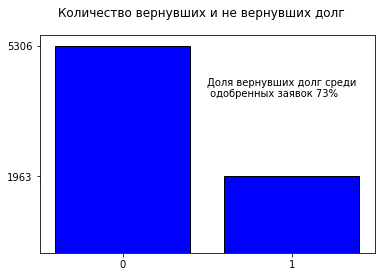

In [9]:
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)

plt.bar([0,1],data['bad'].value_counts(),color = 'blue',edgecolor = 'black')
plt.xticks(ticks=[0,1])
plt.yticks(ticks=[1963,5306])
plt.suptitle('Количество вернувших и не вернувших долг')
plt.text(0.5,4000,'Доля вернувших долг среди\n одобренных заявок {:.0%}'.format(data.query('bad == 0')['bad'].count()/data.query('bad == [0,1]')['bad'].count()))

Для подготовки тренировочной группы необходимо из всех исторических данных оставить только одобренные заявки, то есть те по которым известен результат - вернул или не вернул долг. 

In [10]:
# выбираем данные для построения модели - некоррелирующие между собой количественные признаки и приведенные к количественным, качественные переменные
model_data = data.replace({'region':dict_region_rate})
model_data = pd.get_dummies(model_data,columns = ['work_code'])

# очистим столбцы датафрейма от выбросов

quantity_col4model = ['all_closed_creds_sum_all','bank_inqs_count_quarter',
                                      'delay_more_sum_all','cred_sum_overdue_cc_all','count_overdue_all_3lm',
                                      'all_creds_count_lm','month_income',
                                       'cred_sum_debt_all_all','mfo_inqs_count_month','mfo_closed_count_ly',
                                       'cred_sum_cc_all','cred_max_overdue_max_ly',
                                       'cred_day_overdue_all_sum_all']

quantity_col4standartization = ['all_closed_creds_sum_all','bank_inqs_count_quarter',
                                      'delay_more_sum_all',
                                      'all_creds_count_lm','month_income',
                                       'cred_sum_debt_all_all','mfo_inqs_count_month','mfo_closed_count_ly',
                                       'cred_sum_cc_all','cred_max_overdue_max_ly',
                                       'cred_day_overdue_all_sum_all']

for column in model_data[quantity_col4model]:
    Q1 = model_data[column].quantile(0.25)
    Q3 = model_data[column].quantile(0.75)
    IQR = Q3 - Q1
    model_data[column] = np.where((model_data[column] < Q1 - 1.5*IQR),Q1 - 1.5*IQR,model_data[column])
    model_data[column] = np.where((model_data[column] > Q3 + 1.5*IQR),Q3 + 1.5*IQR,model_data[column])
    
# стандартизируем данные в столбцах с количественными данными, которые будут использоваться при построении
model_data_x = model_data[quantity_col4standartization]

model_data[quantity_col4standartization] = (model_data_x-model_data_x.mean())/model_data_x. std()

# разделяем наши данные на признаки (матрица X) и целевую переменную (y)
X = model_data.query('approved == 1')[['all_closed_creds_sum_all','bank_inqs_count_quarter',
                                      'delay_more_sum_all','cred_sum_overdue_cc_all','count_overdue_all_3lm',
                                      'all_creds_count_lm','month_income',
                                       'cred_sum_debt_all_all','mfo_inqs_count_month','mfo_closed_count_ly',
                                       'cred_sum_cc_all','cred_max_overdue_max_ly',
                                       'cred_day_overdue_all_sum_all','region','work_code_1','work_code_2',
                                      'work_code_3','work_code_4','work_code_5']]
y = model_data.query('approved == 1')['bad']

# разделение модели на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# задаём алгоритм для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# обучим модель случайного леса
rf_model.fit(X_train, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

print('Метрики для модели случайного леса')
print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('\tPrecision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('\tRecall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('\tF1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test,rf_probabilities)))

Метрики для модели случайного леса
	Accuracy: 0.74
	Precision: 0.47
	Recall: 0.05
	F1: 0.09
	ROC_AUC: 0.60


In [11]:
# выбираем данные для построения модели - некоррелирующие между собой количественные признаки и приведенные к количественным, качественные переменные
model_data = data.replace({'region':dict_region_rate})
model_data = pd.get_dummies(model_data,columns = ['work_code'])

# разделяем наши данные на признаки (матрица X) и целевую переменную (y)
X = model_data.query('approved == 1')[['all_closed_creds_sum_all','bank_inqs_count_quarter',
                                      'delay_more_sum_all','cred_sum_overdue_cc_all','count_overdue_all_3lm',
                                      'all_creds_count_lm','month_income','region','work_code_1','work_code_2',
                                      'work_code_3','work_code_4','work_code_5']]
y = model_data.query('approved == 1')['bad']

# разделение модели на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# обучение StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# стадартизируем обучающий и валидационный наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# задаём алгоритм для модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

# установим трэшхолд на уровне 0,3
threshold = 0.5

custom_predictions = [0 if i < threshold else 1 for i in rf_probabilities]

print('Метрики для модели случайного леса')
print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('\tPrecision: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('\tRecall: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('\tF1: {:.2f}'.format(f1_score(y_test, custom_predictions)))
print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_probabilities)))

Метрики для модели случайного леса
	Accuracy: 0.71
	Precision: 0.31
	Recall: 0.07
	F1: 0.12
	ROC_AUC: 0.54


## Вывод

Результаты, которые показывает модель в тесте не впечатляют. Точность классификации 71%. Этот факт указывает на то, что надо пробовать другие способы отбора значимых переменных, более детально обработать исходные данные. Возможно перед отправкой их на построение модели стоит установить, так называемых "плоские запреты" - отсечь явно плохих клиентов. В этом я вижу напрвления для дальнейшем работы. 